<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Pyramid_Arima_24Aug2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from pyramid.arima import auto_arima
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

In [41]:
flight_data=sns.load_dataset("flights")
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [42]:
flight_data_pivot=flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1080x360 with 0 Axes>

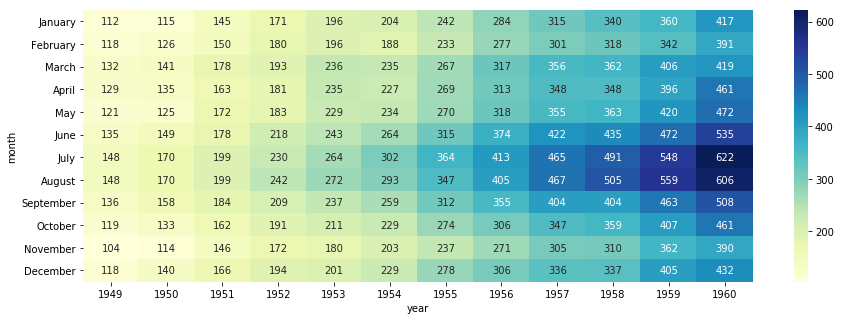

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(flight_data_pivot,annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [44]:
month=pd.date_range('19490131',periods=144,freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [45]:
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [46]:
data=flight_data.loc[:,('datestamp','passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [47]:
data.set_index('datestamp',inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


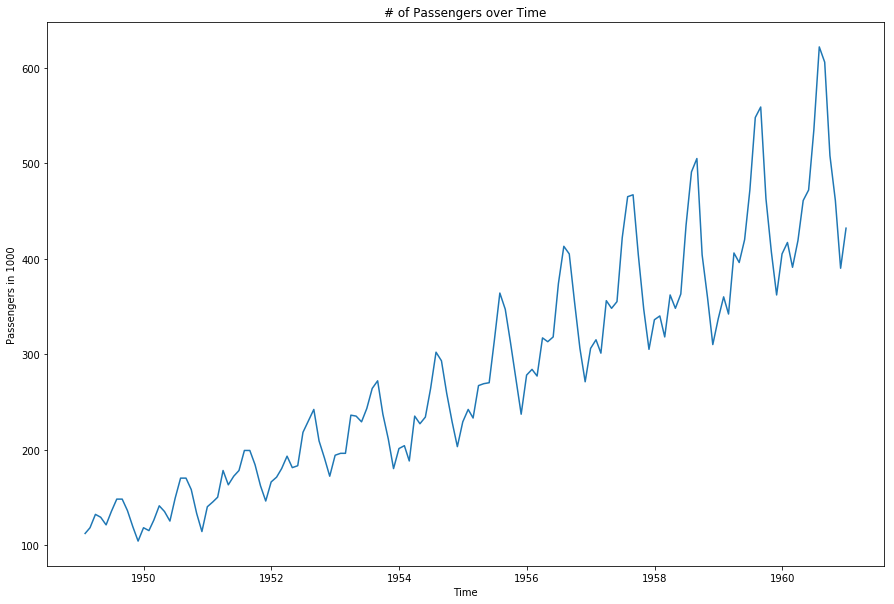

In [48]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over Time')
plt.show;

In [0]:
decomposition = seasonal_decompose(data,model='multiplicative')

<Figure size 1440x720 with 0 Axes>

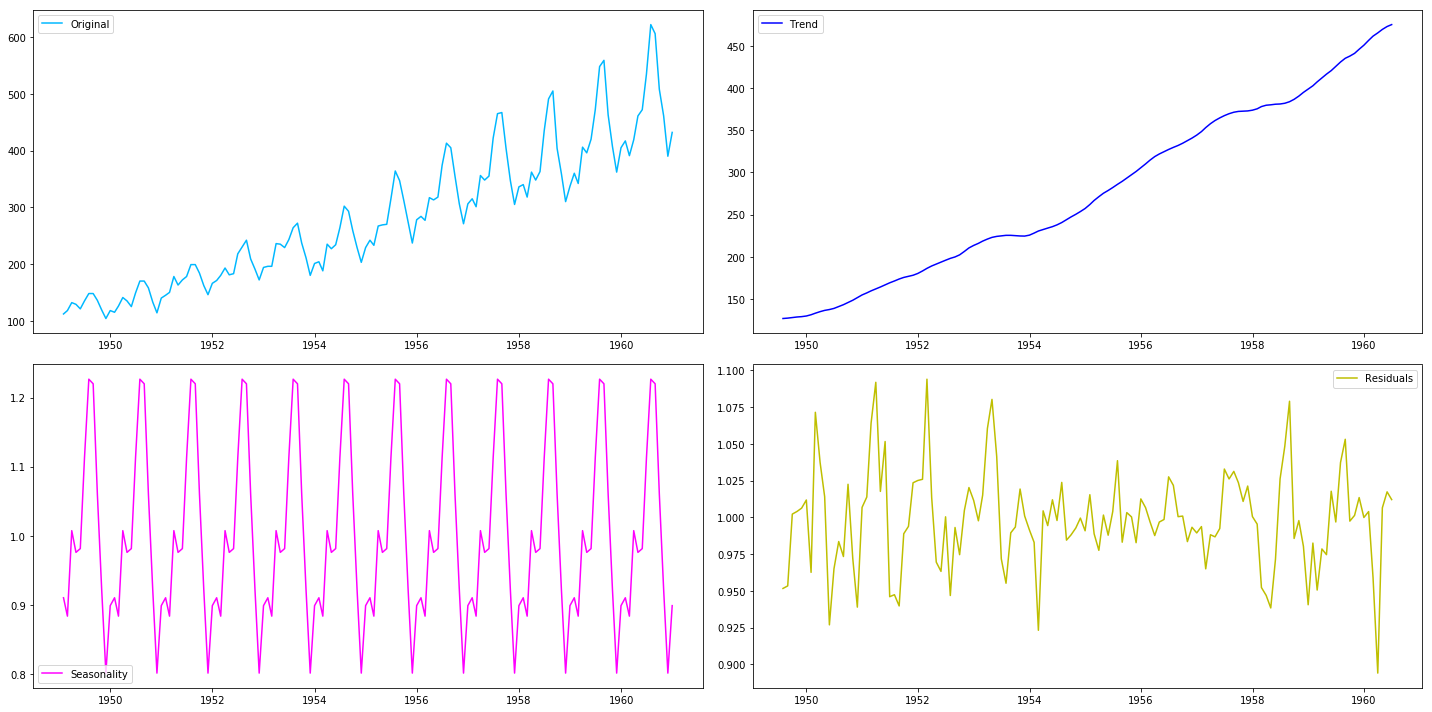

In [50]:
plt.figure(figsize=(20,10))

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(221)
plt.plot(data,color='#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color = '#ff00ff',label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [0]:
decomposition = seasonal_decompose(data,model='additive')

<Figure size 1440x720 with 0 Axes>

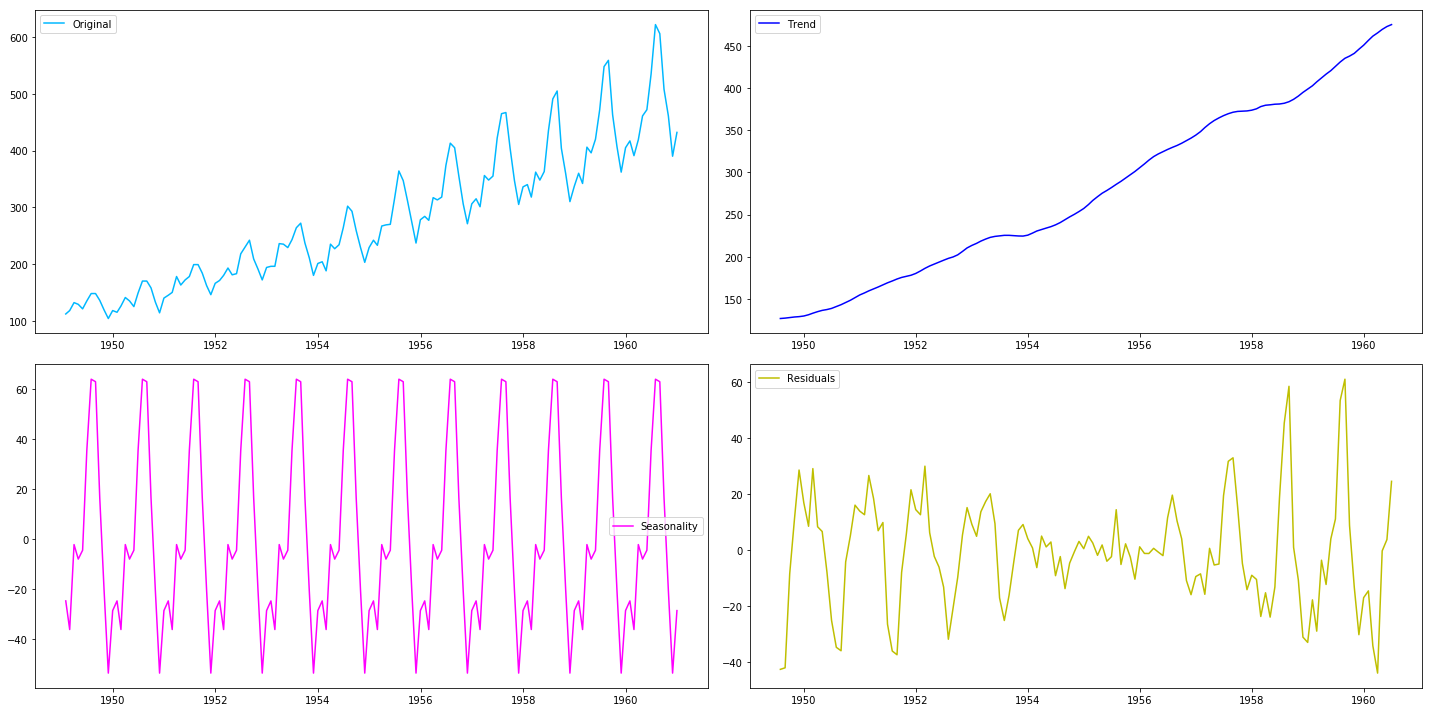

In [52]:
plt.figure(figsize=(20,10))

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(221)
plt.plot(data,color='#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color = '#ff00ff',label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(data)

(0.99, False)

In [54]:
train,test =data[:100],data[100:]
train.shape

test.shape

(100, 1)

(44, 1)

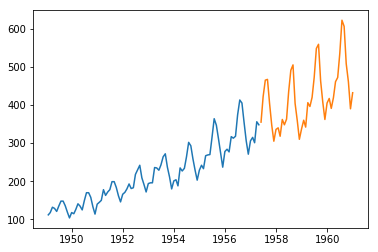

In [55]:
plt.plot(train)
plt.plot(test)
plt.show()

In [57]:
Arima_model = auto_arima(train,start_p=1,start_q=1,max_p=8,max_q=8,start_P=0,start_Q=0,max_P=8,max_Q=8,m=12,seasonal=True,trace=True,d=1,D=1,error_action='warn',suppress_Warnings=True,stepwise=True,random_state=20,n_fits=30)
Arima_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=649.156, BIC=659.019, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=652.680, BIC=657.612, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=645.940, BIC=655.803, Fit time=0.381 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=646.447, BIC=656.311, Fit time=0.397 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=647.792, BIC=655.190, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=647.914, BIC=660.244, Fit time=1.119 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=647.927, BIC=660.257, Fit time=0.576 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=646.264, BIC=661.060, Fit time=4.541 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=649.280, BIC=656.678, Fit time=0.238 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -318.970
Date:                            Sat, 24 Aug 2019   AIC                            645.940
Time:                                    06:38:07   BIC                            655.803
Sample:                                         0   HQIC                           649.912
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5341      1.082      0.493      0.622      -1.587       2.656
ar.L1         -0.2456      0.097     -2.534      0.011      -0.436      -0.056
ar.S.L12      -0.2141      0.088     -2.432      0.015      -0.387      -0.042
sigma2        88.9071     15.058      5.904      0.000      59.394     118.420
===================================================================================
Ljung-Box (Q):                       39.29   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.50   Prob(JB):                         0.30
Heteroskedasticity (H):               1.34   Skew:                             0.40
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=44),index=test.index)
prediction.columns = ['Predicted_Passengers']
prediction

,Predicted_Passengers
datestamp,
1957-05-31,353.975616
1957-06-30,407.704154
1957-07-31,449.359026
1957-08-31,439.839752
1957-09-30,393.485773
1957-10-31,347.268866
1957-11-30,312.269685
1957-12-31,348.983251
1958-01-31,357.769639


<Figure size 1080x720 with 0 Axes>

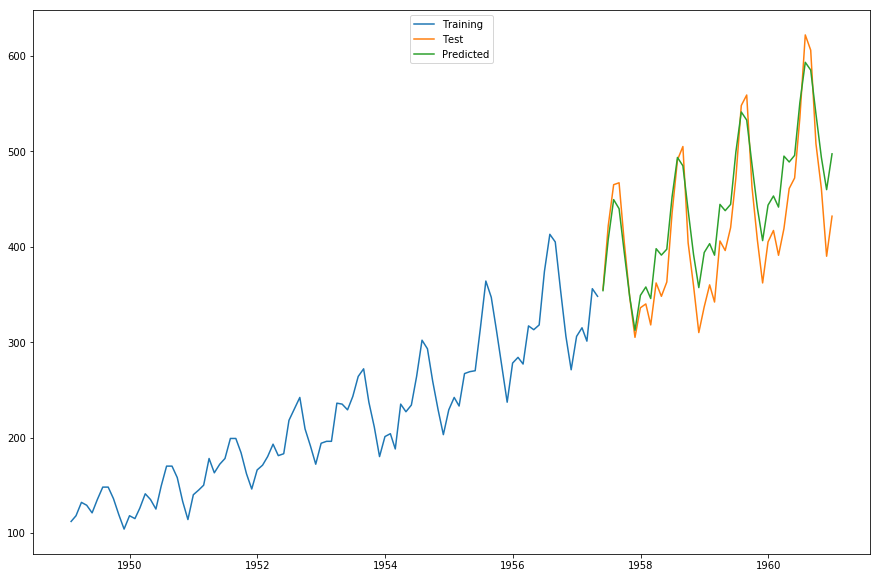

In [60]:
plt.figure(figsize=(15,10))
plt.plot(train,label = 'Training')
plt.plot(test,label = 'Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [61]:
test['Predicted_Passengers']=prediction
test['Error']=test['passengers']-test['Predicted_Passengers']
test

,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,353.975616,1.024384
1957-06-30,422,407.704154,14.295846
1957-07-31,465,449.359026,15.640974
1957-08-31,467,439.839752,27.160248
1957-09-30,404,393.485773,10.514227
1957-10-31,347,347.268866,-0.268866
1957-11-30,305,312.269685,-7.269685
1957-12-31,336,348.983251,-12.983251
1958-01-31,340,357.769639,-17.769639


In [62]:
metrics.mean_absolute_error(test.passengers,test.Predicted_Passengers)


30.332855532058378

In [64]:
metrics.mean_squared_error(test.passengers,test.Predicted_Passengers)

1220.5462974520162

In [65]:
metrics.median_absolute_error(test.passengers,test.Predicted_Passengers)

28.25791340117226

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Error Distribution Over Time')

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([-75.96254756, -69.80718019, -65.33795052, -56.9035056 ,
         -50.51171664, -49.10818495, -47.1280917 , -44.36352637,
         -43.19945057, -43.16443035, -41.78858188, -38.55448946,
         -38.34967832, -36.14258981, -35.91409217, -34.3949401 ,
         -34.08274311, -33.59708061, -32.69865458, -32.68410844,
         -31.2742982

<function matplotlib.pyplot.show>

<Figure size 1440x720 with 0 Axes>

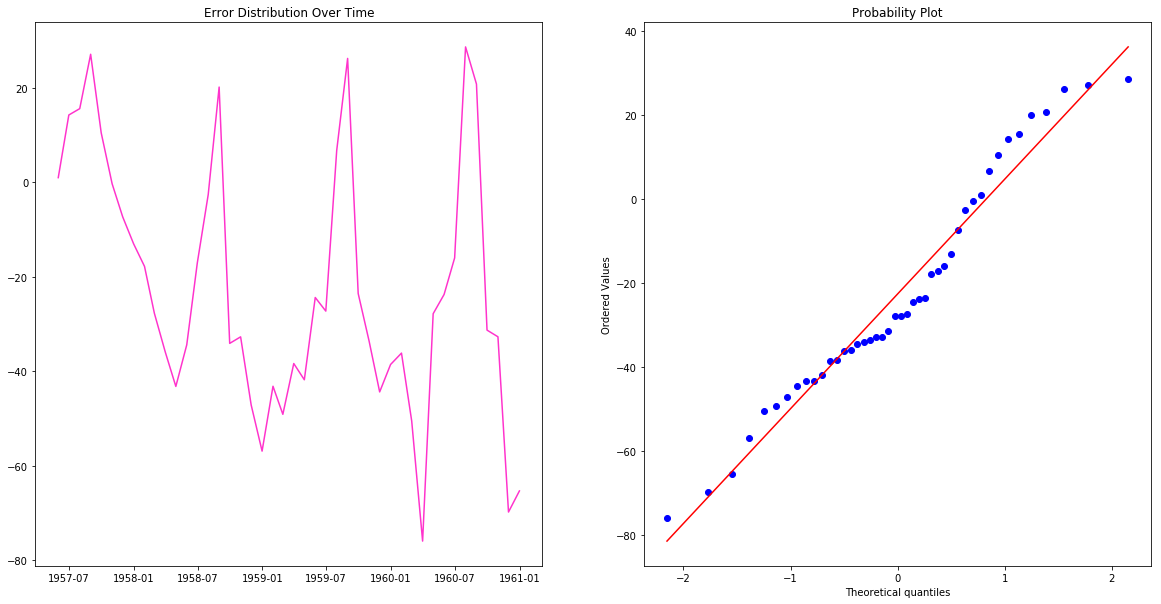

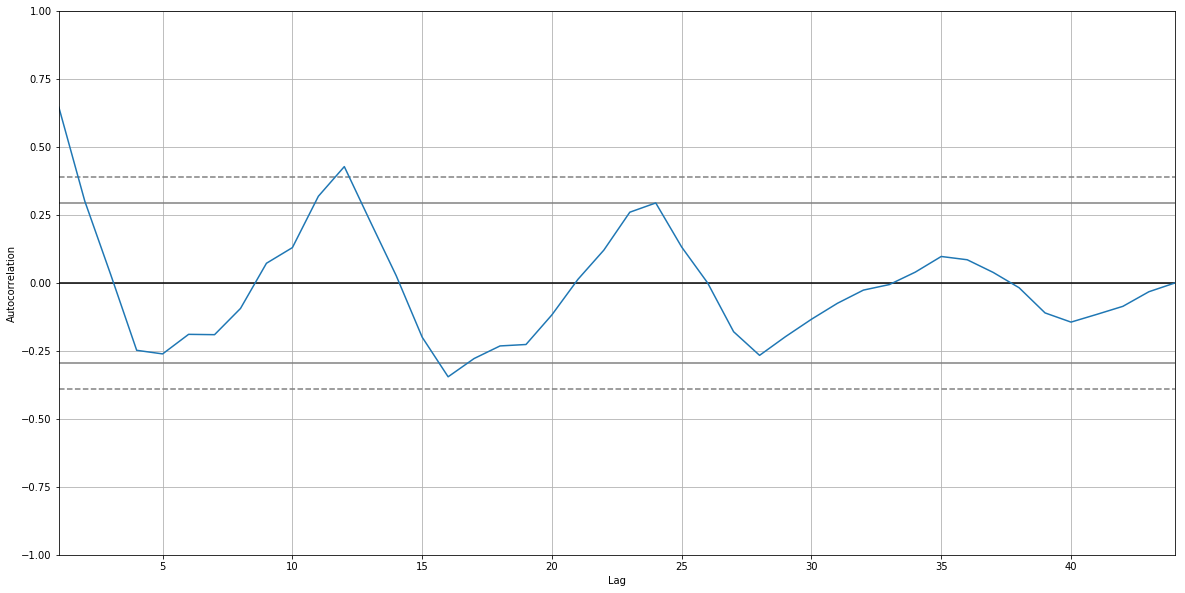

In [68]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error,color='#ff33CC')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error,plot=plt)
plt.show

plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show()